<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install imbalanced-learn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train logistic regression on resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.5207667731629393
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.53      0.58       394
           1       0.39      0.51      0.44       232

    accuracy                           0.52       626
   macro avg       0.52      0.52      0.51       626
weighted avg       0.55      0.52      0.53       626



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load your data
df = pd.read_csv("cleaned_data.csv")

# Prepare features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Logistic Regression and GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.6293929712460063
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       394
           1       0.00      0.00      0.00       232

    accuracy                           0.63       626
   macro avg       0.31      0.50      0.39       626
weighted avg       0.40      0.63      0.49       626



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


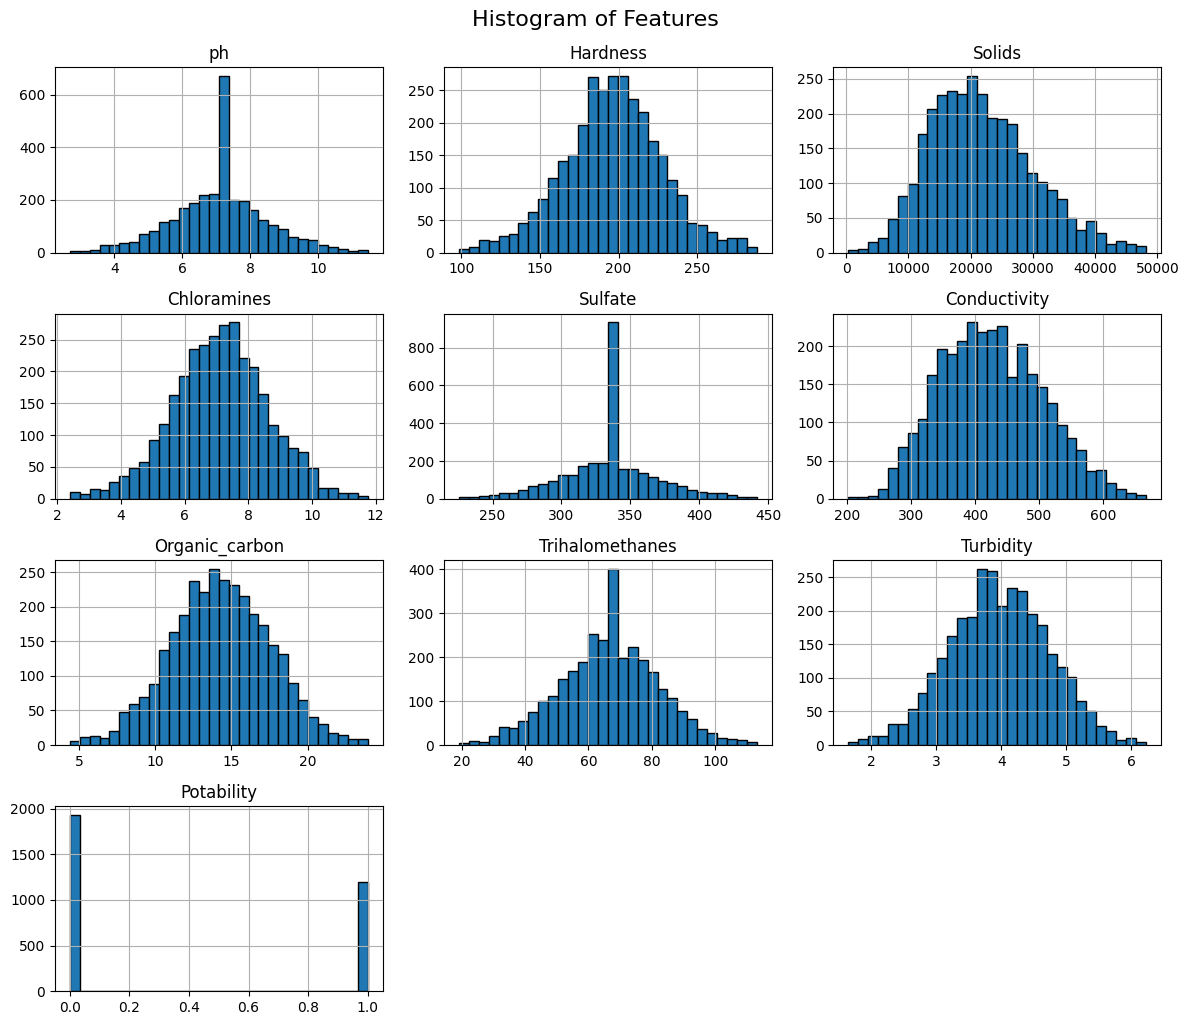

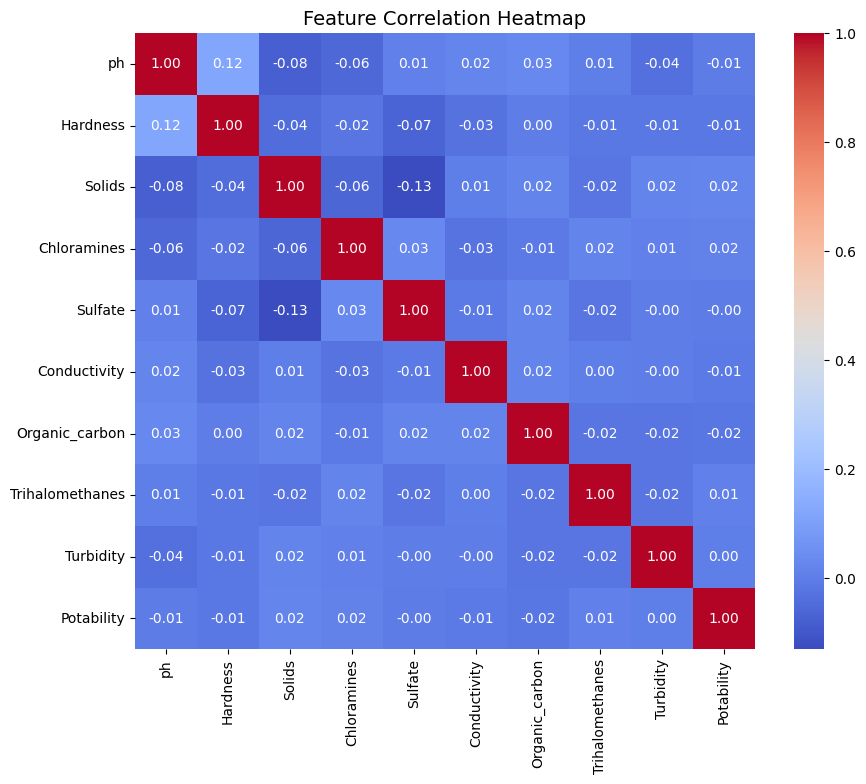

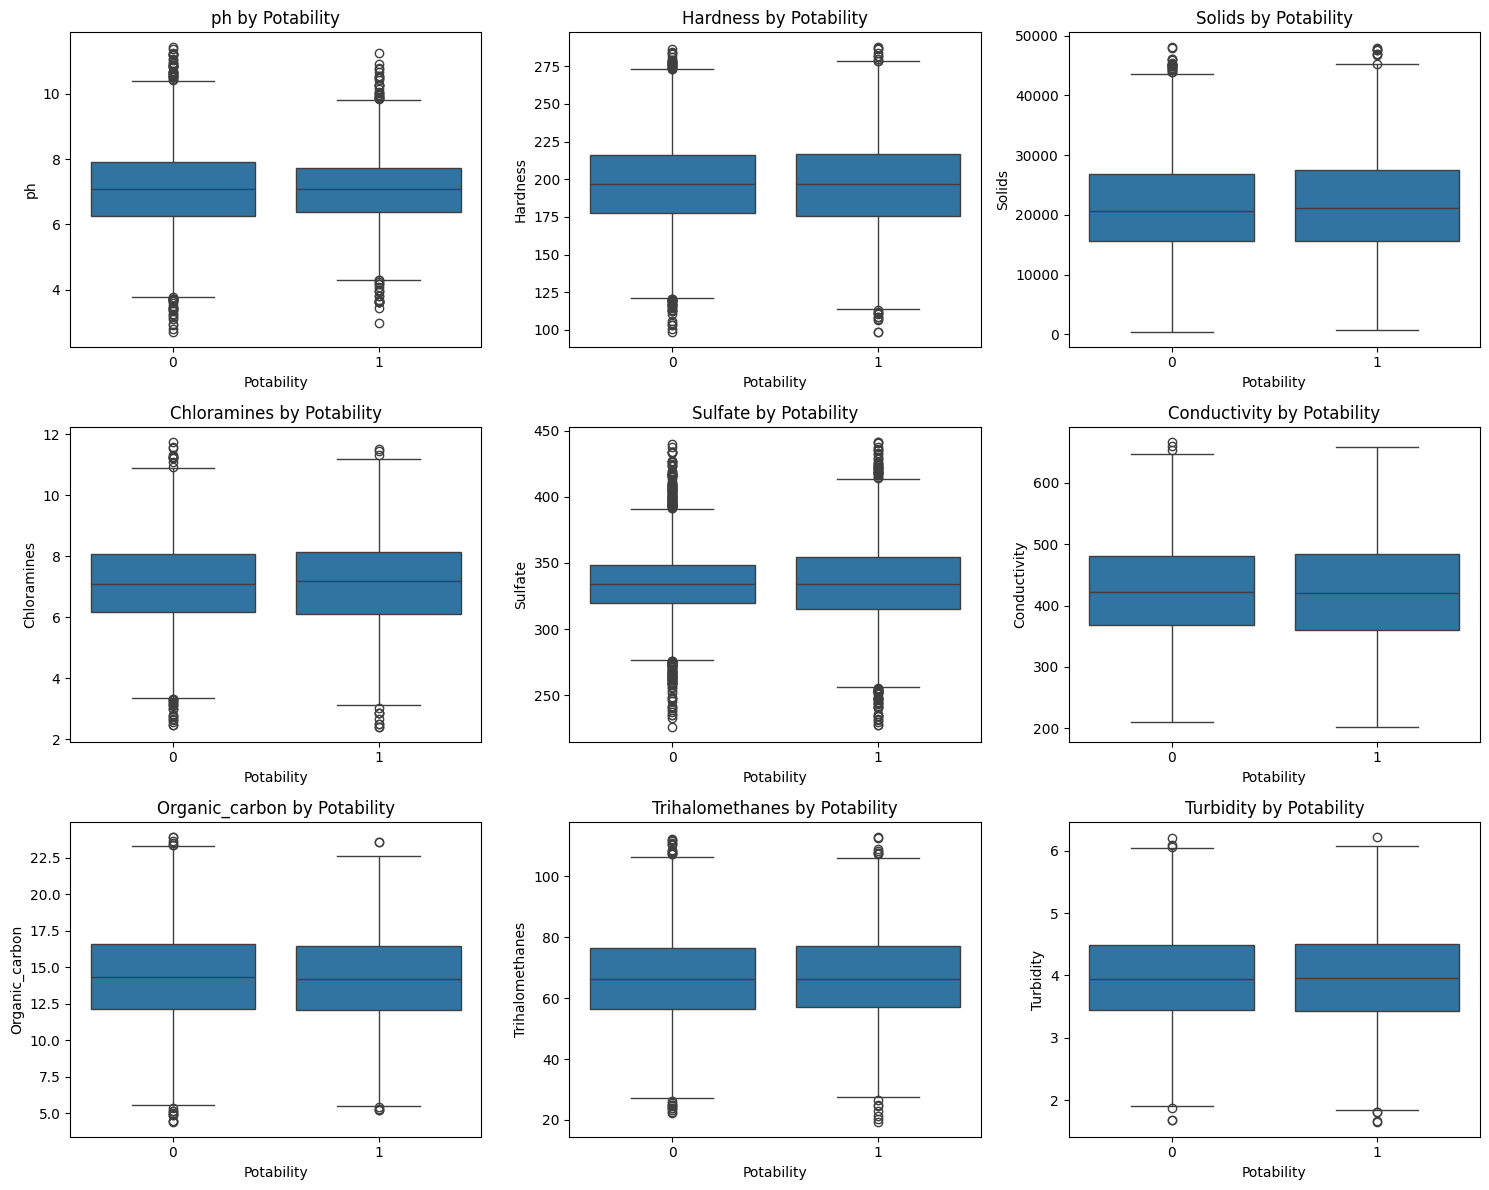

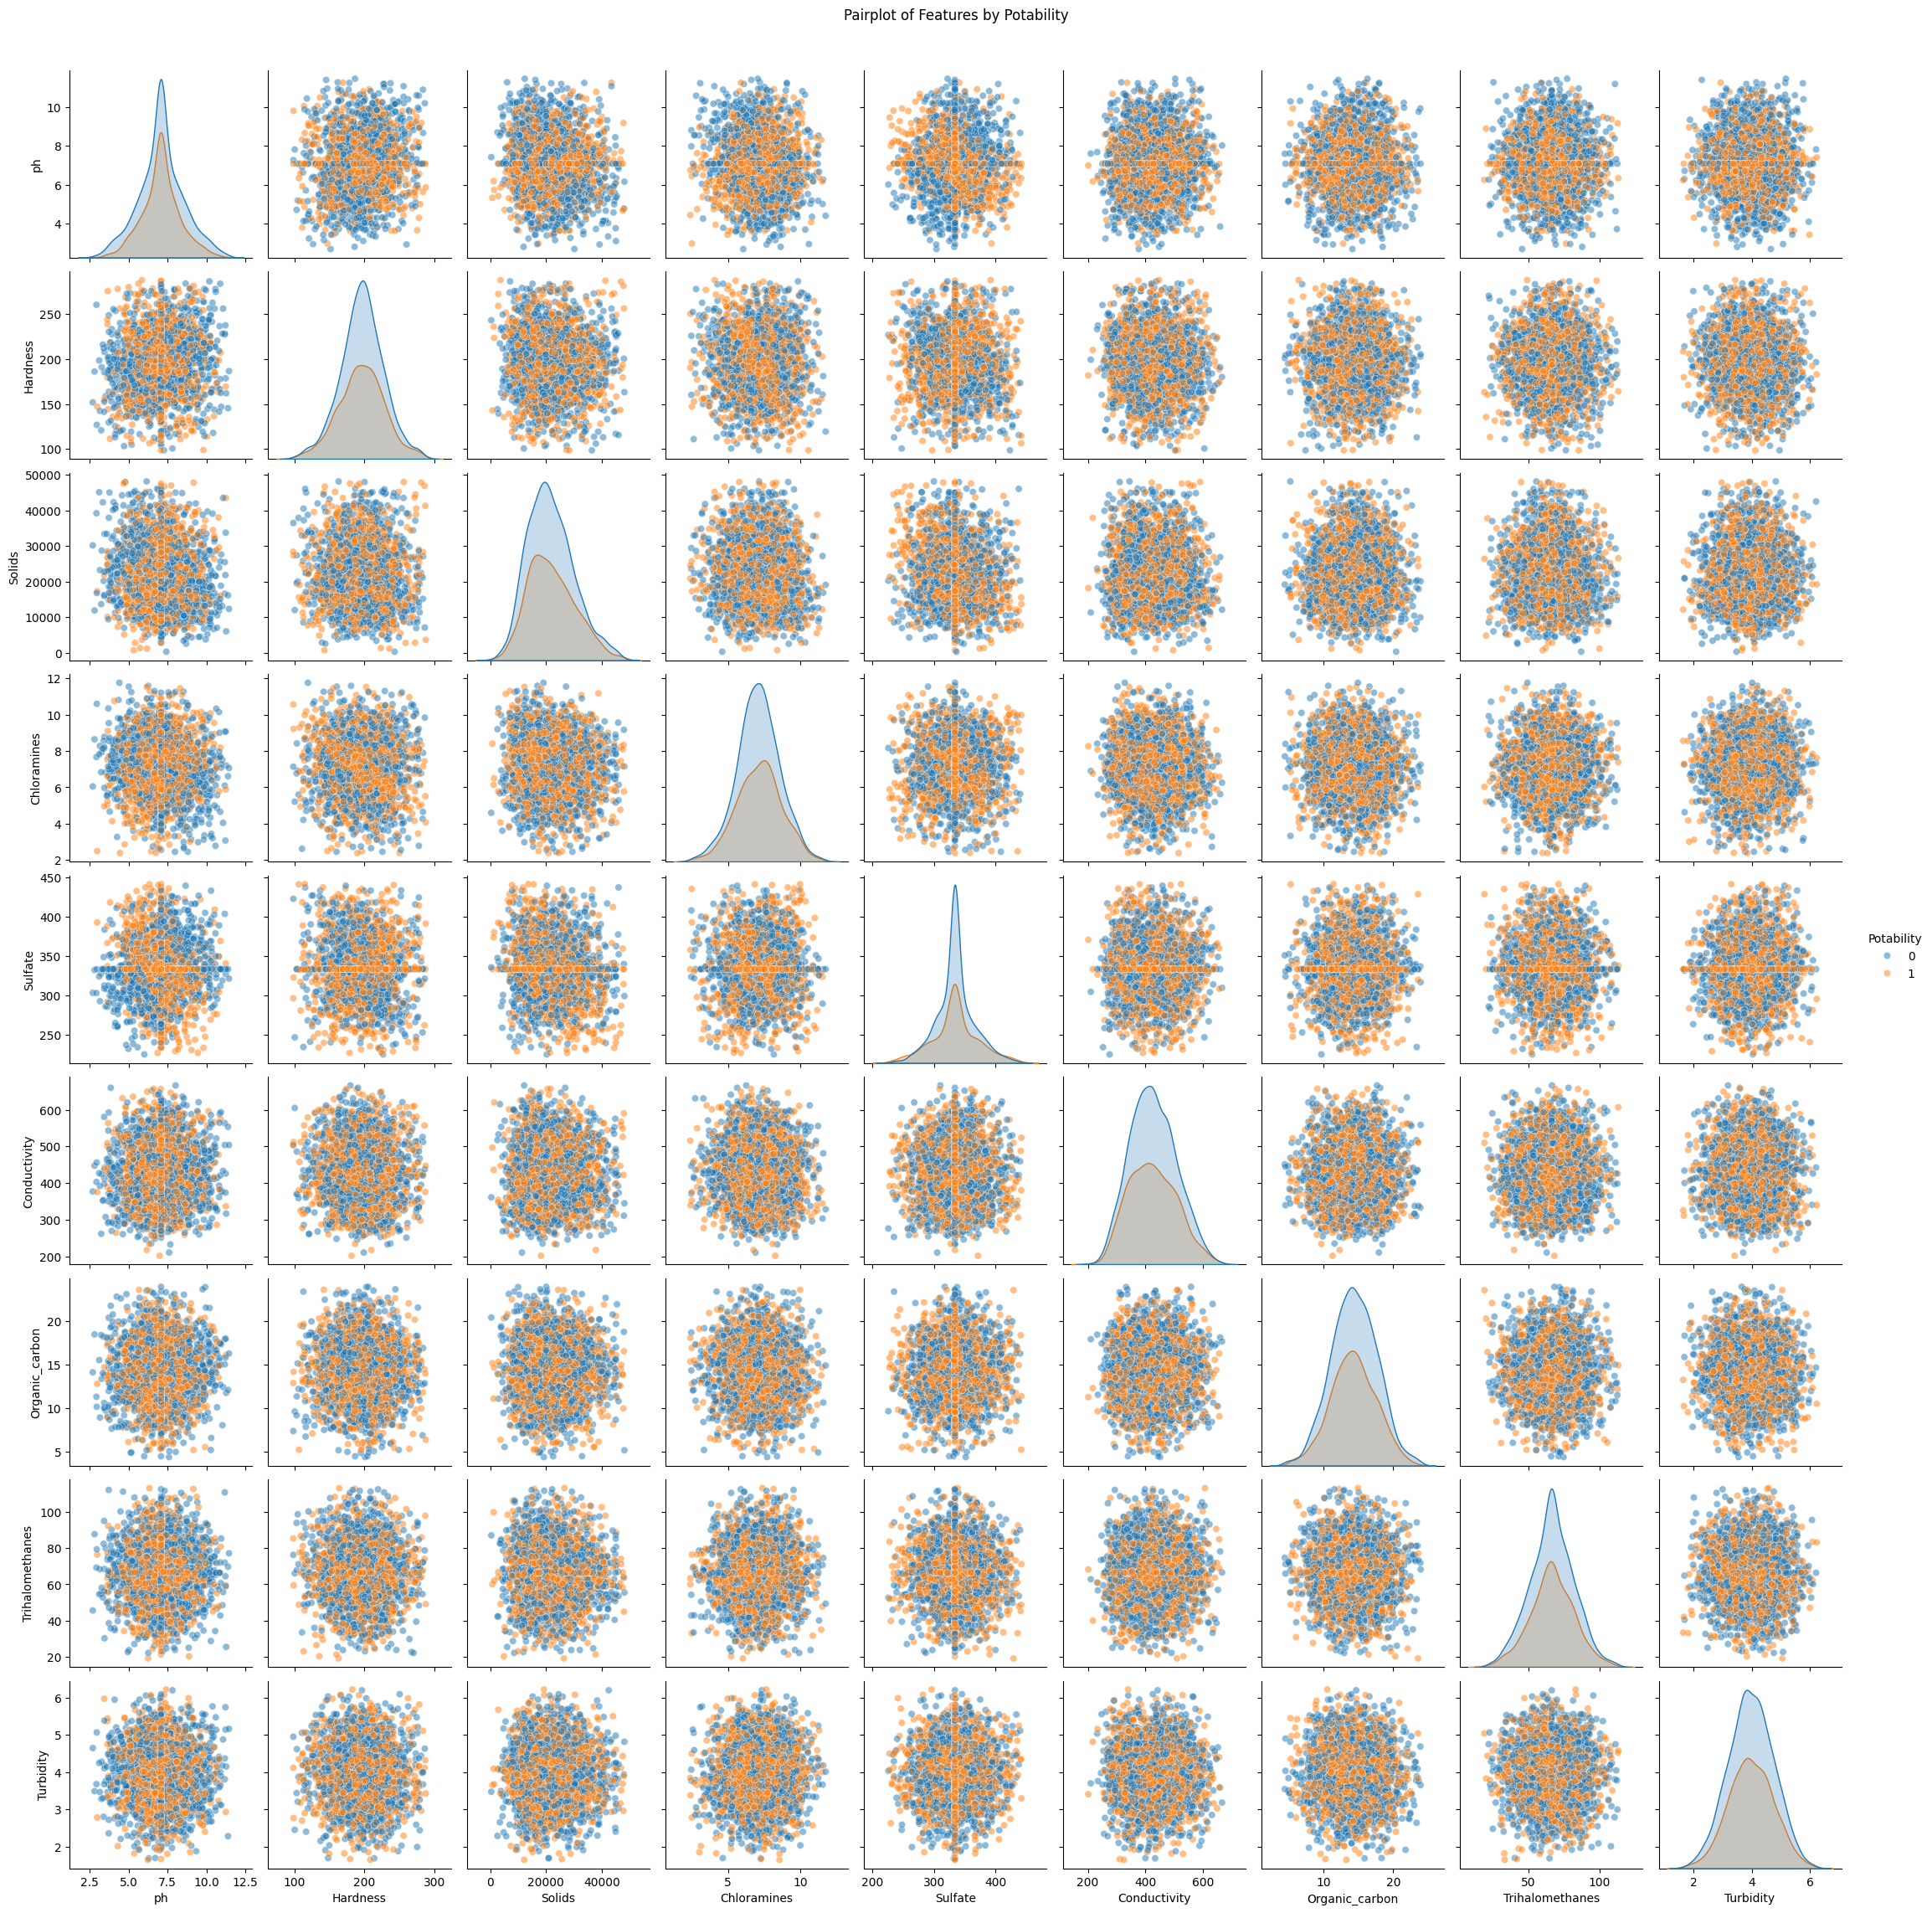

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("cleaned_data.csv")
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle("Histogram of Features", fontsize=16, y=1.02)
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()
features = df.columns[:-1]  # Exclude 'Potability'
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Potability", y=feature, data=df)
    plt.title(f"{feature} by Potability")

plt.tight_layout()
plt.show()
sns.pairplot(df, hue='Potability', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Features by Potability", y=1.02)
plt.show()
